In [1]:
"""
Authors: Phillip Kearns, John Lipor
Spectral Clustering Demo - Iris Test
python version: Python 3.7.2
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import helperFunctions as hf
from mySpectralClustering import mySpectralClustering

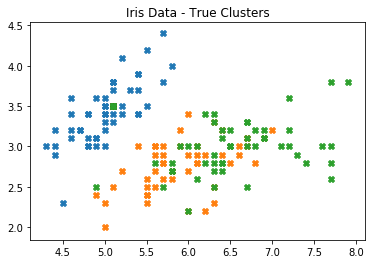

In [2]:
# load Iris dataset (common benchmark dataset)
get_Iris = datasets.load_iris()
X = get_Iris.data.T
D, N = X.shape
trueLabels = get_Iris.target.reshape(N, 1)
K = len(np.unique(trueLabels))

seto_ind = np.argwhere(trueLabels==0) # setosa
vers_ind = np.argwhere(trueLabels==1) # versicolor
virg_ind = np.argwhere(trueLabels==2) # virginica

plt.scatter(X[0,seto_ind], X[1,seto_ind], marker='X')
plt.scatter(X[0,vers_ind], X[1,vers_ind], marker='X')
plt.scatter(X[0,virg_ind], X[1,virg_ind], marker='X')
plt.title("Iris Data - True Clusters");

KMeans error:0.10666666666666667


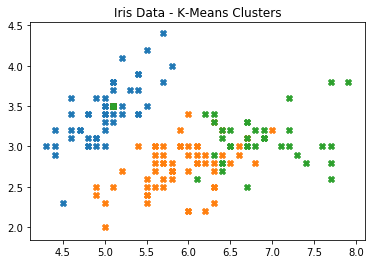

In [18]:
# Kmeans
k_means = KMeans(n_clusters=K, max_iter=100).fit(X.T)
estLabels = k_means.labels_.reshape(N, 1)
kmeanserr, estLabels = hf.missRate(trueLabels, estLabels)
print(f"KMeans error:{kmeanserr}")

seto_ind = np.argwhere(estLabels==0) # setosa
vers_ind = np.argwhere(estLabels==1) # versicolor
virg_ind = np.argwhere(estLabels==2) # virginica

plt.scatter(X[0,seto_ind], X[1,seto_ind], marker='X')
plt.scatter(X[0,vers_ind], X[1,vers_ind], marker='X')
plt.scatter(X[0,virg_ind], X[1,virg_ind], marker='X')
plt.title("Iris Data - K-Means Clusters");

Spectral Clustering error (normalized = 0): 0.66
Spectral Clustering error (normalized = 1): 0.65


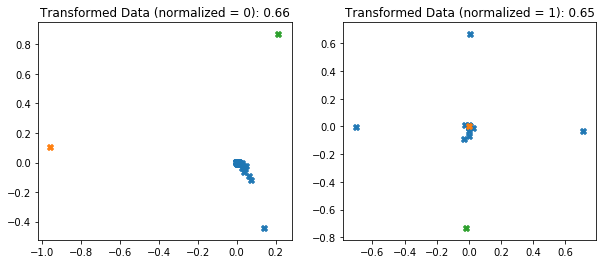

In [10]:
# Spectral Clustering:
nNeighbors = N - 5
wtype = 'gaussian'
sig = 0.5
W = hf.myKNN(X, nNeighbors, wtype, sigma=sig)
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10,4))
for normalize in [0,1]:
    # Apply Spectral Clustering
    estLabels, Y = mySpectralClustering(W, K, normalize)
    scErrUn, UnestLabels_SP = hf.missRate(trueLabels, estLabels)
    print("Spectral Clustering error (normalized = %d): %.2f"%(normalize,scErrUn))
    seto_ind = np.argwhere(estLabels==0) # setosa
    vers_ind = np.argwhere(estLabels==1) # versicolor
    virg_ind = np.argwhere(estLabels==2) # virginica

    axes[normalize].scatter(Y[0,seto_ind], Y[1,seto_ind], marker='X')
    axes[normalize].scatter(Y[0,vers_ind], Y[1,vers_ind], marker='X')
    axes[normalize].scatter(Y[0,virg_ind], Y[1,virg_ind], marker='X')
    axes[normalize].set_title("Transformed Data (normalized = %d): %.2f"%(normalize,scErrUn));
